#**Telecom X parte 2**

##**Preparación de datos**

1.-Importando librearías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')


2.-Cargando y leyendo los datos

In [43]:
datos = pd.read_csv('/content/datos_tratados.csv')

In [5]:
datos.head()

,ID,abandono,cliente_genero,cliente_mayor_edad,cliente_tiene_pareja,cliente_dependientes,cliente_antiguedad,telefono_servicio,telefono_lineas_adicionales,internet_servicio,...,internet_proteccion_dispositivo,internet_soporte_tecnico,internet_tv,internet_peliculas,cuenta_contrato,cuenta_sin_papel,cuenta_metodo_pago,cuenta_cargo_mensual,cuenta_cargo_total,cuentas_diarias
0,0002-ORFBO,0,female,0,1,1,9,1,0,dsl,...,no,yes,yes,no,one year,1,mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,male,0,0,0,9,1,1,dsl,...,no,no,no,yes,month-to-month,0,mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,male,0,0,0,4,1,0,fiber optic,...,yes,no,no,no,month-to-month,1,electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,male,1,1,0,13,1,0,fiber optic,...,yes,no,yes,yes,month-to-month,1,electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,female,1,1,0,3,1,0,fiber optic,...,no,yes,yes,no,month-to-month,1,mailed check,83.9,267.40,2.796667


In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               7267 non-null   object 
 1   abandono                         7267 non-null   int64  
 2   cliente_genero                   7267 non-null   object 
 3   cliente_mayor_edad               7267 non-null   int64  
 4   cliente_tiene_pareja             7267 non-null   int64  
 5   cliente_dependientes             7267 non-null   int64  
 6   cliente_antiguedad               7267 non-null   int64  
 7   telefono_servicio                7267 non-null   int64  
 8   telefono_lineas_adicionales      7267 non-null   int64  
 9   internet_servicio                7267 non-null   object 
 10  internet_seguridad               7267 non-null   object 
 11  internet_respaldo                7267 non-null   object 
 12  internet_proteccion_

3.-Eliminar columnas que no aportan al análisis

In [7]:
#eliminar columnas
datos.drop(['ID'], axis=1, inplace=True)

In [8]:
datos.sample(5)

,abandono,cliente_genero,cliente_mayor_edad,cliente_tiene_pareja,cliente_dependientes,cliente_antiguedad,telefono_servicio,telefono_lineas_adicionales,internet_servicio,internet_seguridad,...,internet_proteccion_dispositivo,internet_soporte_tecnico,internet_tv,internet_peliculas,cuenta_contrato,cuenta_sin_papel,cuenta_metodo_pago,cuenta_cargo_mensual,cuenta_cargo_total,cuentas_diarias
6240,0,female,0,1,1,38,1,0,no,no internet service,...,no internet service,no internet service,no internet service,no internet service,one year,0,mailed check,20.30,749.35,0.676667
5999,0,female,0,1,0,21,1,0,dsl,yes,...,yes,yes,yes,yes,one year,0,mailed check,80.90,1714.95,2.696667
871,1,male,0,1,1,50,1,1,fiber optic,yes,...,yes,no,yes,yes,month-to-month,0,credit card (automatic),105.95,5341.80,3.531667
5843,0,male,0,1,0,8,1,1,fiber optic,no,...,no,no,no,yes,month-to-month,1,bank transfer (automatic),85.65,659.45,2.855000
6094,0,female,0,1,1,50,1,0,fiber optic,no,...,no,no,no,no,month-to-month,1,bank transfer (automatic),69.75,3557.70,2.325000


In [51]:
#encoding
datos_encoded = pd.get_dummies(datos,
                            columns=[
                                "cliente_genero",
                                "internet_servicio",
                                "internet_seguridad",
                                "internet_respaldo",
                                "internet_proteccion_dispositivo",
                                "internet_soporte_tecnico",
                                "internet_tv",
                                "internet_peliculas",
                                "cuenta_contrato",
                                "cuenta_metodo_pago"
                            ],
                            drop_first=True)


In [52]:
datos.describe(['cliente_antiguedad'])

,cliente_antiguedad,cuenta_cargo_mensual,cuenta_cargo_total,cuentas_diarias
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,32.346498,64.720098,2277.182035,2.157337
std,24.571773,30.129572,2268.648587,1.004319
min,0.000000,18.250000,0.000000,0.608333
25%,9.000000,35.425000,396.200000,1.180833
50%,29.000000,70.300000,1389.200000,2.343333
75%,55.000000,89.875000,3778.525000,2.995833
max,72.000000,118.750000,8684.800000,3.958333


Verificación de la Proporción de Cancelación

In [58]:
#Calcular proporcion

counts = datos["abandono"].value_counts()
proportion = datos["abandono"].value_counts(normalize=True)

print("Cantidad de clientes por clase:")
print(counts)
print("\nProporción de clientes por clase:")
print(proportion)


Cantidad de clientes por clase:
abandono
0    5398
1    1869
Name: count, dtype: int64

Proporción de clientes por clase:
abandono
0    0.74281
1    0.25719
Name: proportion, dtype: float64


Balanceo de clases

In [57]:
#Balanceo
from imblearn.under_sampling import RandomUnderSampler

X = datos.drop(columns=["abandono"])
y = datos["abandono"]

undersampler = RandomUnderSampler(random_state=101)
X_under, y_under = undersampler.fit_resample(X, y)

print("Distribución después de undersampling:")
print(y_under.value_counts(normalize=True))

Distribución después de undersampling:
abandono
0    0.5
1    0.5
Name: proportion, dtype: float64


Normalización

In [70]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Variables categóricas y numéricas
categorical_features = [
    "cliente_genero", "internet_servicio", "internet_seguridad",
    "internet_respaldo", "internet_proteccion_dispositivo",
    "internet_soporte_tecnico", "internet_tv", "internet_peliculas",
    "cuenta_contrato", "cuenta_metodo_pago"
]

numeric_features = [
    "cliente_antiguedad", "cuenta_cargo_mensual",
    "cuenta_cargo_total", "cuentas_diarias"
]


preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_features)
    ],
    remainder="passthrough"
)

# Pipeline con Regresión Logística
pipeline_lr = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

# Pipeline con Random Forest
#pipeline_rf = Pipeline(steps=[
   # ("preprocessor", preprocessor),
   # ("classifier", RandomForestClassifier(class_weight="balanced", random_state=101))
#])

##**Análisis de Correlación**

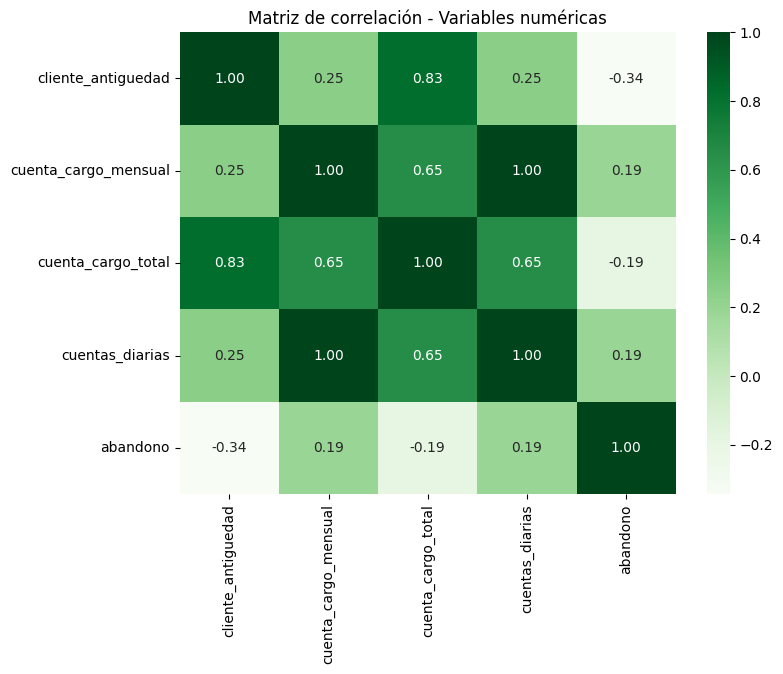

In [71]:
#En variables numéricas:
numeric_cols = ["cliente_antiguedad", "cuenta_cargo_mensual", "cuenta_cargo_total", "cuentas_diarias", "abandono"]
df_numeric = datos[numeric_cols]

# Matriz de correlación
corr_matrix = df_numeric.corr()

# Visualización en heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="Greens", fmt=".2f")
plt.title("Matriz de correlación - Variables numéricas")
plt.show()

clientes con mayor antiguedad abandonan menos (correlación negativa), clientes con mayores cargos abandonan más (correlación positiva).



#Análisis Dirigido

Análisis comparado: Antiguedad vs Cancelación

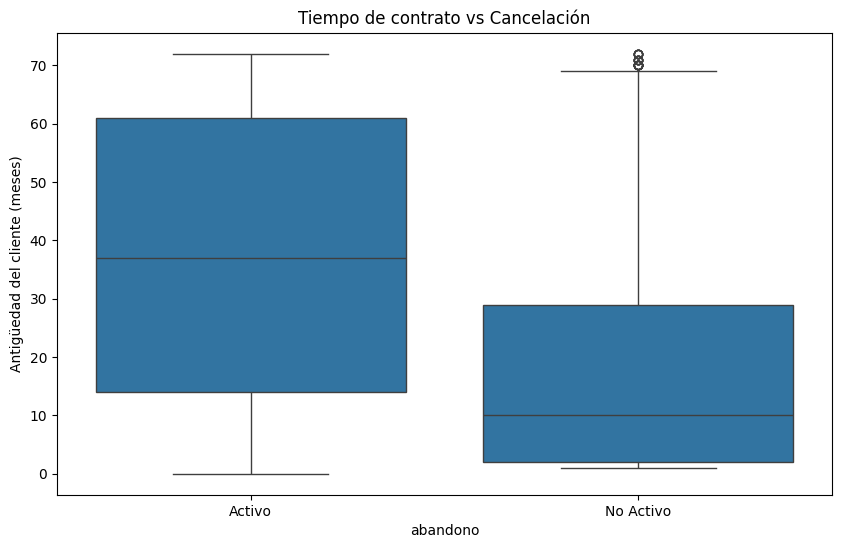

In [72]:
plt.figure(figsize=(10,6))
sns.boxplot(x="abandono", y="cliente_antiguedad", data=datos)
plt.xticks([0,1], ["Activo", "No Activo"])
plt.title("Tiempo de contrato vs Cancelación")
plt.ylabel("Antigüedad del cliente (meses)")
plt.show()

Análisis comparado: Cargo total vs Cancelación

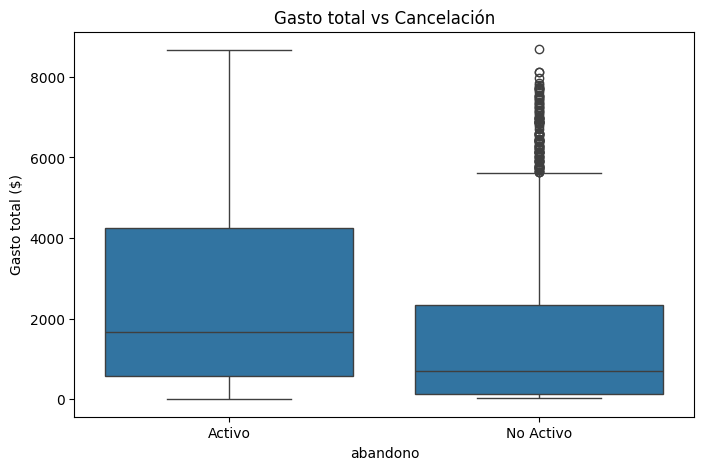

In [73]:
plt.figure(figsize=(8,5))
sns.boxplot(x="abandono", y="cuenta_cargo_total", data=datos)
plt.xticks([0,1], ["Activo", "No Activo"])
plt.title("Gasto total vs Cancelación")
plt.ylabel("Gasto total ($)")
plt.show()

Análisis comparado: Cargo total vs cargo *mensual*

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

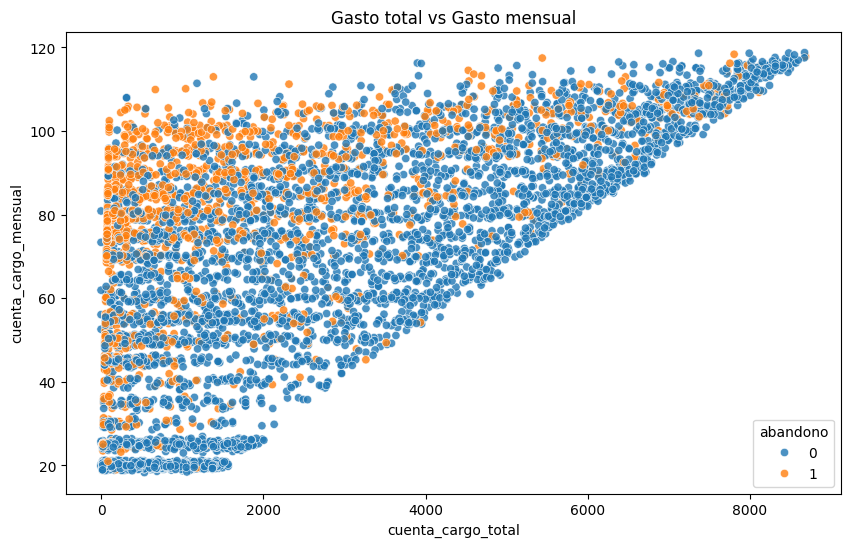

In [74]:
#Análisis comparado: Cargo total vs cargo *mensual*
plt.figure(figsize=(10,6))
sns.scatterplot(x="cuenta_cargo_total", y="cuenta_cargo_mensual", hue="abandono", alpha=0.8, data=datos)
plt.title("Gasto total vs Gasto mensual")
plt

##**Modelado**

In [82]:
#Separación de datos

from sklearn.model_selection import train_test_split


X = datos.drop(columns=["abandono"])
y = datos["abandono"]

# train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,  #30% prueba
    random_state=101,
    stratify=y
)

# Tamaños
print("Tamaño de entrenamiento:", X_train.shape[0])
print("Tamaño de prueba:", X_test.shape[0])

# Proporción de clases
print("\nProporción de clases en train:")
print(y_train.value_counts(normalize=True))
print("\nProporción de clases en test:")
print(y_test.value_counts(normalize=True))

Tamaño de entrenamiento: 5086
Tamaño de prueba: 2181

Proporción de clases en train:
abandono
0    0.742823
1    0.257177
Name: proportion, dtype: float64

Proporción de clases en test:
abandono
0    0.742779
1    0.257221
Name: proportion, dtype: float64


Creación de modelos:

In [76]:
#Creación de modelos

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression


categorical_features = [
    "cliente_genero", "internet_servicio", "internet_seguridad",
    "internet_respaldo", "internet_proteccion_dispositivo",
    "internet_soporte_tecnico", "internet_tv", "internet_peliculas",
    "cuenta_contrato", "cuenta_metodo_pago"
]

numeric_features = [
    "cliente_antiguedad", "cuenta_cargo_mensual",
    "cuenta_cargo_total", "cuentas_diarias"
]

# Preprocesamiento: escala numéricas + one-hot encoding para categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_features)
    ]
)

# Pipeline Regresión Logística
pipeline_lr = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

# Entrenamiento
pipeline_lr.fit(X_train, y_train)

# Predicción
y_pred_lr = pipeline_lr.predict(X_test)

In [77]:

categorical_features = [
    "cliente_genero", "internet_servicio", "internet_seguridad",
    "internet_respaldo", "internet_proteccion_dispositivo",
    "internet_soporte_tecnico", "internet_tv", "internet_peliculas",
    "cuenta_contrato", "cuenta_metodo_pago"
]

numeric_features = [
    "cliente_antiguedad", "cuenta_cargo_mensual",
    "cuenta_cargo_total", "cuentas_diarias"
]

In [78]:
#Evaluación de los modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


def evaluar_modelo(y_true, y_pred, modelo_nombre):
    print(f"--- Evaluación {modelo_nombre} ---")
    print("Exactitud (Accuracy):", round(accuracy_score(y_true, y_pred), 3))
    print("Precisión:", round(precision_score(y_true, y_pred), 3))
    print("Recall:", round(recall_score(y_true, y_pred), 3))
    print("F1-Score:", round(f1_score(y_true, y_pred), 3))
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=["Activo","Canceló"])
    disp.plot(cmap="Blues")

**Regresión Logística / KNN:** Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

--- Evaluación Regresión Logística ---
Exactitud (Accuracy): 0.741
Precisión: 0.498
Recall: 0.806
F1-Score: 0.616


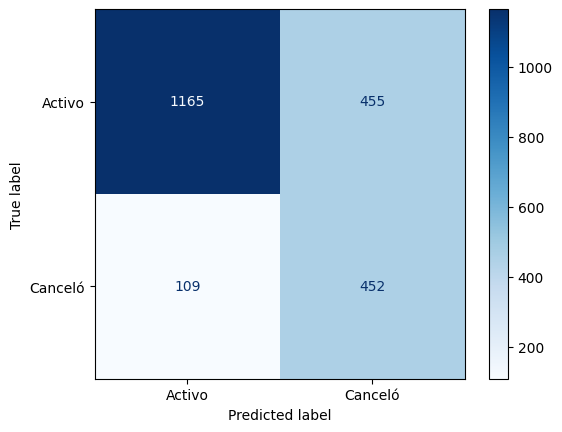

In [79]:
#Regresión logística
preprocessor_lr = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_features)
    ]
)

pipeline_lr = Pipeline(steps=[
    ("preprocessor", preprocessor_lr),
    ("classifier", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

# Entrenar y predecir
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)
evaluar_modelo(y_test, y_pred_lr, "Regresión Logística")



**Árbol de Decisión / Random Forest:** Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

In [80]:
#Random Forest
preprocessor_rf = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_features)
    ],
    remainder="passthrough"
)

pipeline_rf = Pipeline(steps=[
    ("preprocessor", preprocessor_rf),
    ("classifier", RandomForestClassifier(n_estimators=200, random_state=101, class_weight="balanced"))
])

--- Evaluación Random Forest ---
Exactitud (Accuracy): 0.796
Precisión: 0.638
Recall: 0.474
F1-Score: 0.544


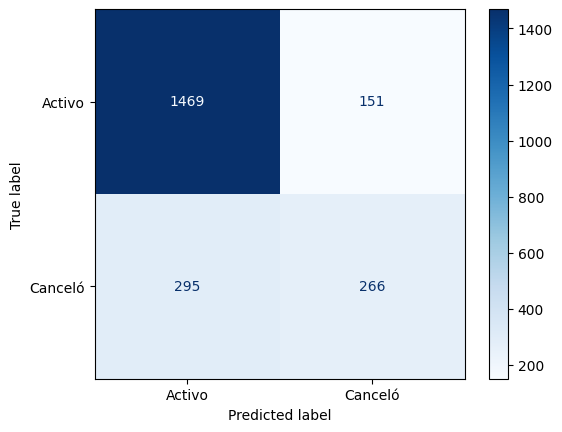

In [83]:

pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)
evaluar_modelo(y_test, y_pred_rf, "Random Forest")

#**Conclusiones**

Importancia de las variables

**Regresión Logística:** Investiga los coeficientes de las variables, que muestran su contribución a la predicción de cancelación.

In [96]:
#Regresión Logística: Investiga los coeficientes de las variables, que muestran su contribución a la predicción de cancelación.
#coeficiente de variables
coef_df = pd.DataFrame({
    'Variable': pipeline_lr['preprocessor'].get_feature_names_out(),
    'Coefficient': pipeline_lr['classifier'].coef_[0]
})
coef_df

#ordenar descendente
coef_df = coef_df.sort_values(by='Coefficient', ascending=True)
coef_df

,Variable,Coefficient
20,cat__cuenta_contrato_two year,-1.393340
0,num__cliente_antiguedad,-1.188267
19,cat__cuenta_contrato_one year,-0.860152
8,cat__internet_seguridad_yes,-0.345737
14,cat__internet_soporte_tecnico_yes,-0.330911
3,num__cuentas_diarias,-0.211290
1,num__cuenta_cargo_mensual,-0.211290
11,cat__internet_proteccion_dispositivo_no intern...,-0.171231
15,cat__internet_tv_no internet service,-0.171231
13,cat__internet_soporte_tecnico_no internet service,-0.171231


Los coeficientes indican la relación entre cada una de las variables y la probabilidad de cancelación:

Positivo:  al aumentar la variable, aumenta la probabilidad de cancelación.

Negativo:  al aumentar la variable, disminuye la probabilidad de cancelación.

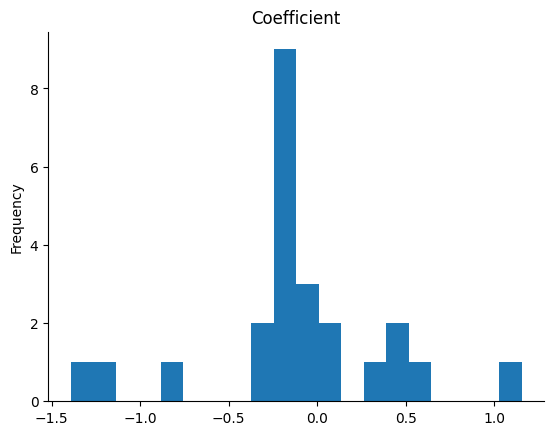

In [90]:
# @title Coefficient

from matplotlib import pyplot as plt
coef_df['Coefficient'].plot(kind='hist', bins=20, title='Coefficient')
plt.gca().spines[['top', 'right',]].set_visible(False)



El histograma te muestra la frecuencia con la que aparecen diferentes rangos de valores de coeficientes. Esto puede ayudarte a entender la distribución de la influencia de las variables en el modelo de Regresión Logística. Por ejemplo, si hay muchos coeficientes cercanos a cero, significa que muchas variables tienen un impacto relativamente pequeño en la predicción. Coeficientes más alejados de cero (positivos o negativos) indican variables con un mayor impacto.

**Random Forest**: Utiliza la importancia de las variables proporcionada por el modelo. Random Forest calcula la importancia basándose en cómo cada variable contribuye a la reducción de la impureza durante las divisiones de los árboles.

Valores más altos → mayor importancia en la predicción de cancelación.

In [94]:
#Random Forest
importances = pipeline_rf['classifier'].feature_importances_
importance_df = pd.DataFrame({
    'Variable': pipeline_rf['preprocessor'].get_feature_names_out(),
    'Importance': importances
})

#ordenar por el mas importante
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Variable,Importance
28,remainder__cuenta_cargo_total,0.156155
23,remainder__cliente_antiguedad,0.154870
29,remainder__cuentas_diarias,0.122305
27,remainder__cuenta_cargo_mensual,0.119479
16,cat__cuenta_contrato_two year,0.053181
1,cat__internet_servicio_fiber optic,0.038228
18,cat__cuenta_metodo_pago_electronic check,0.031215
15,cat__cuenta_contrato_one year,0.027510
4,cat__internet_seguridad_yes,0.024570
0,cat__cliente_genero_male,0.023027


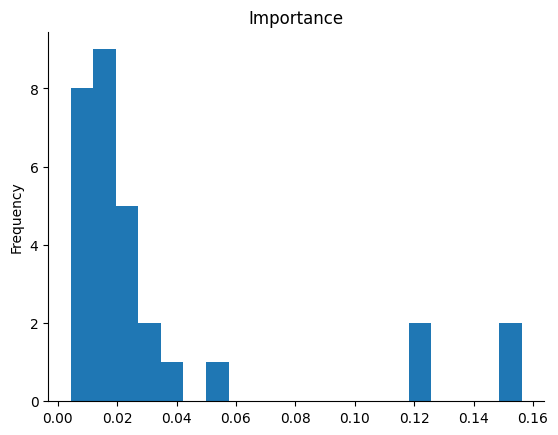

In [97]:
# @title Importance

from matplotlib import pyplot as plt
importance_df['Importance'].plot(kind='hist', bins=20, title='Importance')
plt.gca().spines[['top', 'right',]].set_visible(False)

#**Informe Final**

##Modelos


Se entrenaron dos modelos para predecir la cancelación de clientes:

1.-Regresión Logística

2.-Random Forest

Ambos modelos fueron evaluados para un conjunto de prueba, considerando métricas de Exactitud, Precisión, Recall, F1-score y Matriz de Confusión.

##Importancia

**Para Regresión logística:**

Las variables con mayor importancia fueron:
El **contrato mayor a dos años** y la **antiguedad del cliente** reduce la probabilidad de cancelación


**Para Random forest:**

Las variables más relevantes fueron:
El **Total gastado por el cliente** y la **antiguedad del cliente** reduce la probabilidad de cancelación.

##Factores que afectan la cancelación

1. **Tipo y duración del contrato:** Un contrato de más plazo hace que disminuya la cancelación.
2. **Antigüedad del cliente:** Los clientes más antiguos presentan menor riesgo de abandonar, pudiendo considerarse más leales..
3. **Gasto total y servicios contratados:** A Mayor gasto y algunos servicios adicioales (Fibra óptica por ejemplo), pueden disminuir la probabilidad de cancelar.


#Estrategías de retención

Se pueden considerar las siguientes estrategias para una retención de clientes:

1. Aumentar  la  renovación a 1 o 2 años de contrato con métodos de pago electrónico, aplicando un pequeño descuento en la cuenta o en servicios adicionales, ya que estos servicios hacen que aumente levemente la posibilidad de cancelar.
2. Premiar a los clientes más antiguos con servicios de costo marginal, que les permita obtener prestaciones adicionales sin influir de manera importante en su cuenta total.
3. Aumentar la percepción del valor del Servicio.